3번 미션 top5 추천

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 판례 데이터를 불러옵니다.
df = pd.read_csv(r'C:\Users\bluecom011\Desktop\Sesac_AI\7주차\02.07\reason2_text.csv')

# TF-IDF 벡터화를 위한 객체 생성
vectorizer = TfidfVectorizer()

# 텍스트 데이터를 TF-IDF 행렬로 변환
tfidf_matrix = vectorizer.fit_transform(df['str'])

# 사용자 입력을 받습니다.
user_question = input("질문을 입력하세요: ")

# 사용자 입력을 TF-IDF 벡터로 변환
user_tfidf = vectorizer.transform([user_question])

# TF-IDF 벡터 간의 코사인 유사도를 계산하여 유사한 판례를 찾습니다.
similarities = cosine_similarity(user_tfidf, tfidf_matrix)

# 코사인 유사도가 높은 순으로 정렬하여 상위 5개 판례의 인덱스와 유사도를 찾습니다.
most_similar_indices = similarities.argsort(axis=1)[0][-5:][::-1]
most_similar_values = similarities[0, most_similar_indices]

# 상위 5개 유사한 판례와 해당 유사도를 출력합니다.
print("상위 5개 유사한 판례 및 유사도:")
for idx, sim_value in zip(most_similar_indices, most_similar_values):
    recommended_case = df.loc[idx]
    print("유사도:", sim_value)
    print(recommended_case)


상위 5개 유사한 판례 및 유사도:
유사도: 0.6419113860782287
이유         상고이유(상고이유서 제출기간이 지난 다음 제출된 상고이유보충서면은 이를 보충하는...
str      상고 이유 상고 이유 제출 기간 지난 다음 제출 상고 이유 보충 서면 보충 범위 를...
사건종류명                                                   민사
판례내용     【원고, 상고인】 원고 (소송대리인 변호사 정환영)<br/>【피고, 피상고인】 글로...
Name: 1627, dtype: object
유사도: 0.5999029959716681
이유       1. 제1심 판결의 인용<br/>  이 법원이 적을 이유는, 아래와 같이 고쳐 쓰거...
str      제 심 판결 인용 이 법원 적 이유 아래 추가 것 제외 제 심 판결 이유 민사소송법...
사건종류명                                                   민사
판례내용     【원고, 피항소인 겸 항소인】 원고 1 외 16인 (소송대리인 변호사 김주관 외 1...
Name: 1818, dtype: object
유사도: 0.5837722229233021
이유         상고이유(상고이유서 제출기간이 지난 다음 제출된 상고이유보충서의 기재는 상고이유...
str      상고 이유 상고 이유 제출 기간 지난 다음 제출 상고 이유 보충 의 기재 상고 이유...
사건종류명                                                   형사
판례내용     【피 고 인】 피고인 1 외 5인<br/>【상 고 인】 피고인들 및 검사<br/>【...
Name: 1174, dtype: object
유사도: 0.5695532337093234
이유         상고이유를 판단한다. <br/>  1. 근로기준법상의 근로자에 해당하는지는 계약...
str      상고 이유 판단 근로기준법 상의 근로자 해당 계약 형식

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# '사건종류명'이 '형사'인 데이터만 필터링
df_criminal_cases = df[df['사건종류명'] == '형사']

# TF-IDF 벡터화를 위한 객체 생성
vectorizer = TfidfVectorizer()

# '형사' 사건의 'str' 텍스트 데이터를 TF-IDF 행렬로 변환
tfidf_matrix_criminal = vectorizer.fit_transform(df_criminal_cases['str'])

# TF-IDF 행렬 간의 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix_criminal)


In [7]:
df_criminal_cases.head(5)

,이유,str,사건종류명,판례내용
1,상고이유를 판단한다.<br/> 1. 공소사실의 요지와 원심의 판단<br/> ...,상고 이유 판단 사실 요지 원심 판단 연장 근로 제한 위반 근로기준법 위반 공소 사...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...
3,상고이유를 판단한다.<br/> 1. 제1 상고이유에 관하여<br/> 가. 저...,상고 이유 판단 제 상고 이유 관 저작권법 보호 것 인간 사상 감정 말 문자 음 색...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...
10,상고이유를 판단한다. <br/> 1. 저작권법 제136조 제2항 제1호는 저작...,상고 이유 판단 저작권법 제 제 항 제 호 저작인격권 실연자 인격권 침해 저작자 실...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 린...
12,상고이유를 판단한다.<br/> 1. 사실오인 및 심리미진 여부<br/> 이 ...,상고 이유 판단 사실 오인 및 심리 미진 여부 이 부분 상고 이유 형사소송법 제 제...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 박남...
13,상고이유를 판단한다.<br/> 1. 공직선거법 제60조의3 제1항 제5호(이하...,상고 이유 판단 공직선거법 제 제 항 제 호 이하 이 사건 조항 예비 후보자 허용 ...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 하...


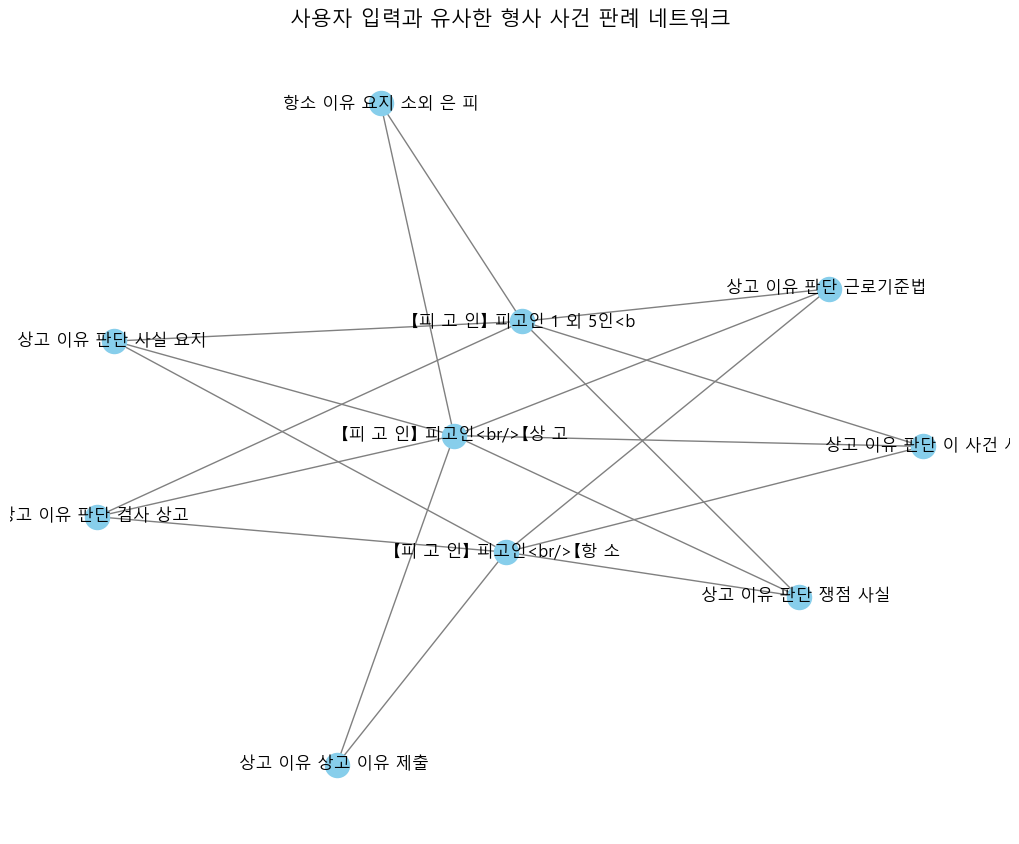

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# # 사용자 입력 처리 (예시 키워드: "절도")
# user_input = "절도"
# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
# 사용자 입력 키워드의 TF-IDF 변환
user_tfidf = vectorizer.transform([user_question])

# 코사인 유사도 계산
cosine_sim = cosine_similarity(user_tfidf, tfidf_matrix_criminal).flatten()

# 상위 N개의 유사한 판례 찾기
N = 10
top_indices = cosine_sim.argsort()[-N:][::-1]

# 네트워크 그래프 생성
G = nx.Graph()

# 유사한 판례와 연관된 판례를 노드로 추가
for idx in top_indices:
    case_content = df_criminal_cases.iloc[idx]['판례내용'][:20]  # 판례 내용 요약
    G.add_node(case_content)  # 노드 추가
    for j in top_indices:
        if idx != j:
            G.add_edge(case_content, df_criminal_cases.iloc[j]['str'][:15])  # 엣지 추가

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 노드의 배치
nx.draw(G, pos, with_labels=True, node_color='skyblue',font_family='Malgun Gothic', edge_color='gray')
plt.title('사용자 입력과 유사한 형사 사건 판례 네트워크', fontsize=15)
plt.show()
